titulo

In [189]:
import pandas as pd
import numpy as np
import sympy as sym

import matplotlib.pyplot as plt
import scipy.optimize  as opt

In [190]:
archivo = 'Simulación_P1.csv'
data = pd.read_csv(archivo)
data

,longitud de onda,T% SM1,T% SM2,Unnamed: 3,Unnamed: 4
0,356.82851,50.735,47.925,3.568285,0.01
1,353.19880,52.398,51.198,3.531988,NaN
2,349.64220,54.175,53.825,3.496422,NaN
3,346.15251,54.603,55.238,3.461525,NaN
4,342.73572,57.190,56.700,3.427357,NaN
5,339.38571,60.399,59.643,3.393857,NaN
6,336.10056,61.871,61.502,3.361006,NaN
7,332.87840,64.103,63.680,3.328784,NaN
8,329.71381,67.390,66.574,3.297138,NaN
9,326.61238,69.075,68.086,3.266124,NaN


In [191]:
x = data.iloc[:,3].values
y = data.iloc[:,1].values
y

array([50.735, 52.398, 54.175, 54.603, 57.19 , 60.399, 61.871, 64.103,
       67.39 , 69.075, 69.055, 67.151, 63.504, 58.507, 52.798, 47.09 ,
       41.855, 37.344, 33.643, 30.754, 28.576, 26.96 , 25.775, 24.907,
       24.485, 24.262, 24.04 , 23.826, 23.622, 23.42 , 23.219])

In [192]:
m = 8

def fun_obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [193]:
b03 = np.zeros(m+1)
ajuste3 = opt.minimize(fun_obj, b03, args=(x,y,m))

In [194]:
ajuste3

      fun: 237.72326420839806
 hess_inv: array([[ 1.22521924e+00,  2.08905136e-02,  3.53547621e-01,
         2.96034786e-02, -1.72176818e-01, -5.58348638e-04,
         4.60153254e-03,  7.31994078e-03, -1.60985030e-03],
       [ 2.08905136e-02,  6.34751075e-01,  6.65834750e-02,
        -1.84740559e-01, -4.74976531e-02,  3.75667073e-01,
        -3.21515058e-01,  9.97116632e-02, -1.04677939e-02],
       [ 3.53547621e-01,  6.65834750e-02,  1.60176163e+00,
         2.14416039e-01, -3.97205133e-02,  4.56141358e-02,
        -3.42235898e-01,  1.63928496e-01, -2.09891568e-02],
       [ 2.96034786e-02, -1.84740559e-01,  2.14416039e-01,
         1.34352646e+00,  6.18609966e-01,  4.40128661e-01,
        -1.23002360e+00,  4.94855418e-01, -5.79823508e-02],
       [-1.72176818e-01, -4.74976531e-02, -3.97205133e-02,
         6.18609966e-01,  2.10545934e+00,  3.41554149e-01,
        -1.76169059e+00,  7.12286154e-01, -8.27968304e-02],
       [-5.58348638e-04,  3.75667073e-01,  4.56141358e-02,
         4

In [195]:
xpoints = x
ypoints = y

beta = ajuste3.x

#yhat3 = (ajuste3.x[0]+ajuste3.x[1]*xpoints+ajuste3.x[2]*(xpoints**2)+ajuste3.x[3]*(xpoints**3))

yhat = beta.dot([x**i for i in range(m+1)])

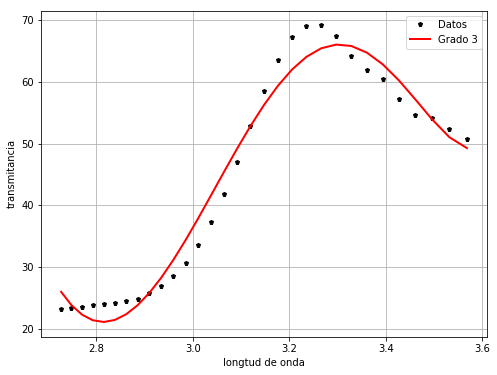

In [196]:

plt.figure(figsize=(8,6))

#Graficar los datos

plt.plot(xpoints, ypoints, 'pk', ms=5, label='Datos')
plt.plot(xpoints, yhat, 'r', lw=2, label='Grado 3')

#Mostrar las etiquetas, los ejes, el  mallado y la figura

plt.grid()
plt.xlabel('longtud de onda')
plt.ylabel('transmitancia')
plt.legend(loc = 'best')


plt.show()